# Breast Cancer Wisconsin Classification
Project by Group 5

Participants:

Yash Rajesh Doshi (Student ID: N01597522)

Ornab Olindo (Student ID: N01533188)

Yash Dhawan (Student ID: N01597517)

Irem Midillic (Student ID: N01562987)

Sakshi Singh (Student ID: N01597828)

In [ ]:
### Importing required libraries
import pandas as pd  # Importing the pandas library and aliasing it as pd
import numpy as np  # Importing the numpy library and aliasing it as np
import seaborn as sns  # Importing the seaborn library and aliasing it as sns
import matplotlib.pyplot as plt  # Importing the matplotlib.pyplot module and aliasing it as plt
import warnings  # Importing the warnings library to manage warning messages
warnings.filterwarnings("ignore")  # Ignoring all warning messages


In [ ]:
df = pd.read_csv("data.csv")  # Reading a CSV file named "data.csv" into a DataFrame called df

In [ ]:
df.head()  # Displaying the first five rows of the DataFrame df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Dropping the columns 'id' and 'Unnamed: 32' from the DataFrame df in place
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [ ]:
# Retrieving the unique values in the 'diagnosis' column of the DataFrame df
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

Diagnosis (M = malignant, B = benign) here we going to label encoding (M=1 & B=0)

In [ ]:
# Converting the 'diagnosis' column values to 1 if 'M' (Malignant), otherwise 0 (Benign)
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [ ]:
# Displaying the first five rows of the updated DataFrame df
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Generating descriptive statistics for the DataFrame df
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Displaying a summary of the DataFrame df, including the data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Using info() we can see three is no Nan values and all features are numerical

In [ ]:
# Retrieving the dimensions (number of rows and columns) of the DataFrame df
df.shape

(569, 31)

In [ ]:
# Counting the number of duplicate rows in the DataFrame df
df.duplicated().sum()

0

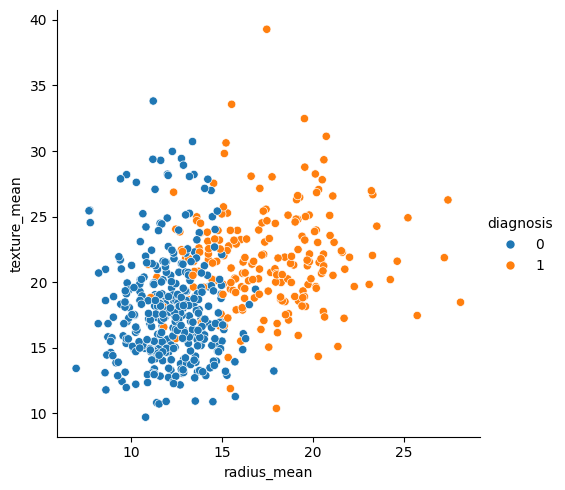

In [ ]:
# Creating a scatter plot of 'radius_mean' vs 'texture_mean' with color coding based on 'diagnosis'
sns.relplot(x="radius_mean",y="texture_mean",hue="diagnosis",data=df);

For the above scatter plot, we can see that there is a positive relationship between radius_mean and texture_mean. Also, we can see that the presence of cancer in nucleus cells can be determined by a hypothesis that "An increase in texture mean and radius mean in the nucleus cell of the tumor means that there is presence of cancer in the cell'.

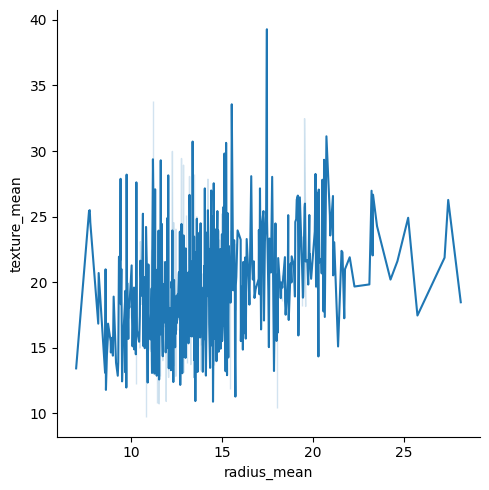

In [ ]:
# Creating a line plot of 'radius_mean' vs 'texture_mean'
sns.relplot(x="radius_mean",y="texture_mean",kind="line",data=df)

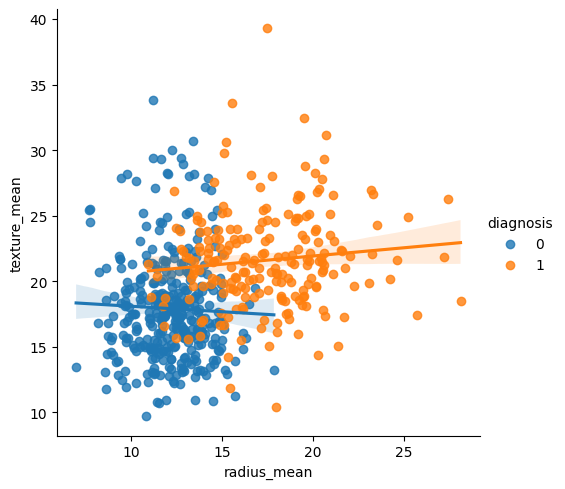

In [ ]:
# Creating a scatter plot with regression lines for 'radius_mean' vs 'texture_mean', color-coded by 'diagnosis'
sns.lmplot(x="radius_mean",y="texture_mean",hue="diagnosis",data=df)

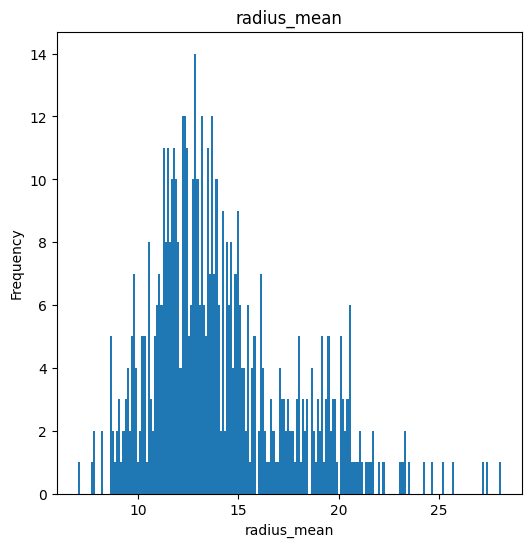

In [ ]:
# Plotting a histogram to visualize the frequency distribution of the 'radius_mean' column with 200 bins and a size of 6x6 inches
df["radius_mean"].plot(kind='hist', bins=200, figsize=(6, 6))
plt.title("radius_mean")  # Setting the title of the histogram
plt.xlabel("radius_mean")  # Labeling the x-axis
plt.ylabel("Frequency")  # Labeling the y-axis
plt.show()  # Displaying the histogram

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

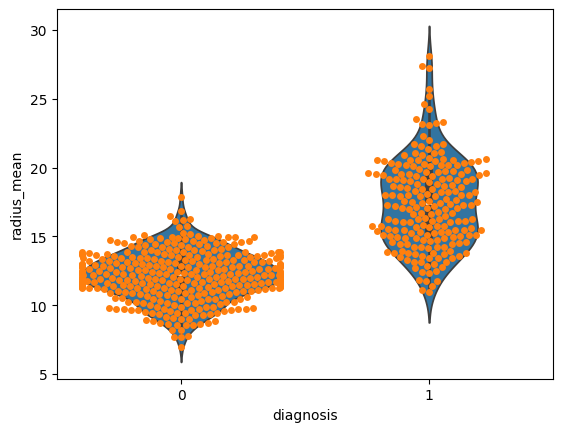

In [ ]:
# Creating a violin plot to show the distribution of 'radius_mean' for each 'diagnosis' category
sns.violinplot(x="diagnosis", y="radius_mean", data=df)
# Adding a swarm plot over the violin plot to display individual data points of 'radius_mean' for each 'diagnosis' category
sns.swarmplot(x="diagnosis", y="radius_mean", data=df)

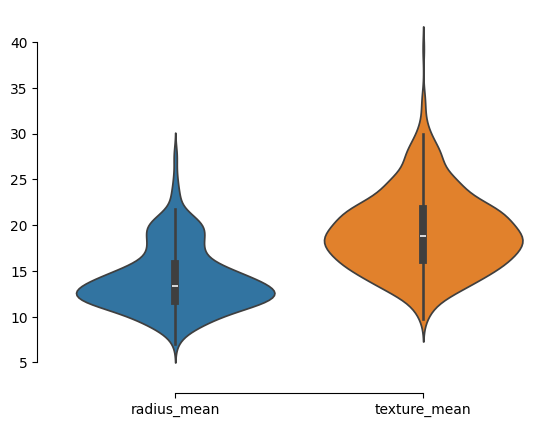

In [ ]:
# Visualizing the distribution and potential outliers in the first two columns of the DataFrame df using a violin plot
f, ax = plt.subplots()  # Creating a new figure and axes for the plot
sns.violinplot(data=df.iloc[:, 1:3])  # Plotting a violin plot for the second and third columns of df
sns.despine(offset=10, trim=True)  # Removing the top and right spines from the plot for better aesthetics


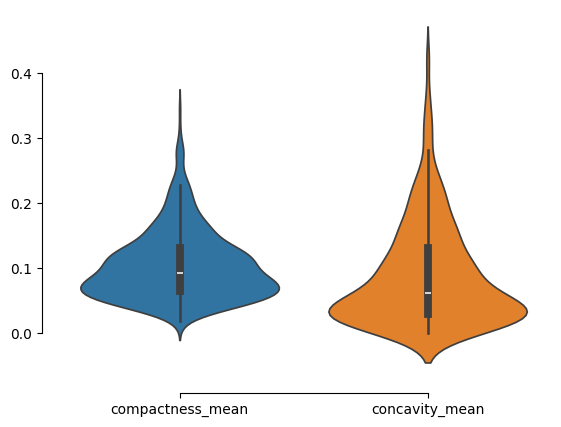

In [ ]:
# Visualizing the distribution and potential outliers in the seventh and eighth columns of the DataFrame df using a violin plot
f, ax = plt.subplots()  # Creating a new figure and axes for the plot
sns.violinplot(data=df.iloc[:, 6:8])  # Plotting a violin plot for the seventh and eighth columns of df
sns.despine(offset=10, trim=True)  # Removing the top and right spines from the plot for better aesthetics


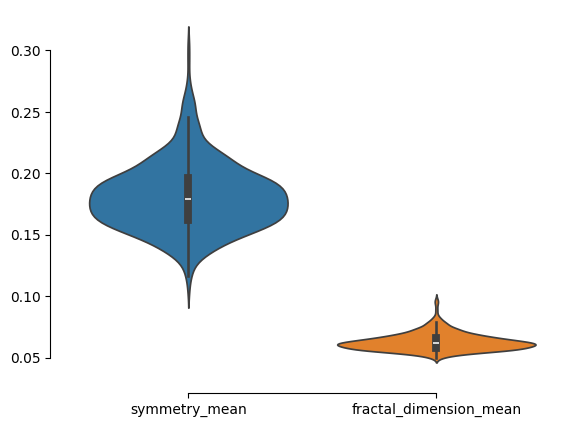

In [ ]:
# Visualizing the distribution and potential outliers in the tenth and eleventh columns of the DataFrame df using a violin plot
f, ax = plt.subplots()  # Creating a new figure and axes for the plot
sns.violinplot(data=df.iloc[:, 9:11])  # Plotting a violin plot for the tenth and eleventh columns of df
sns.despine(offset=10, trim=True)  # Removing the top and right spines from the plot for better aesthetics

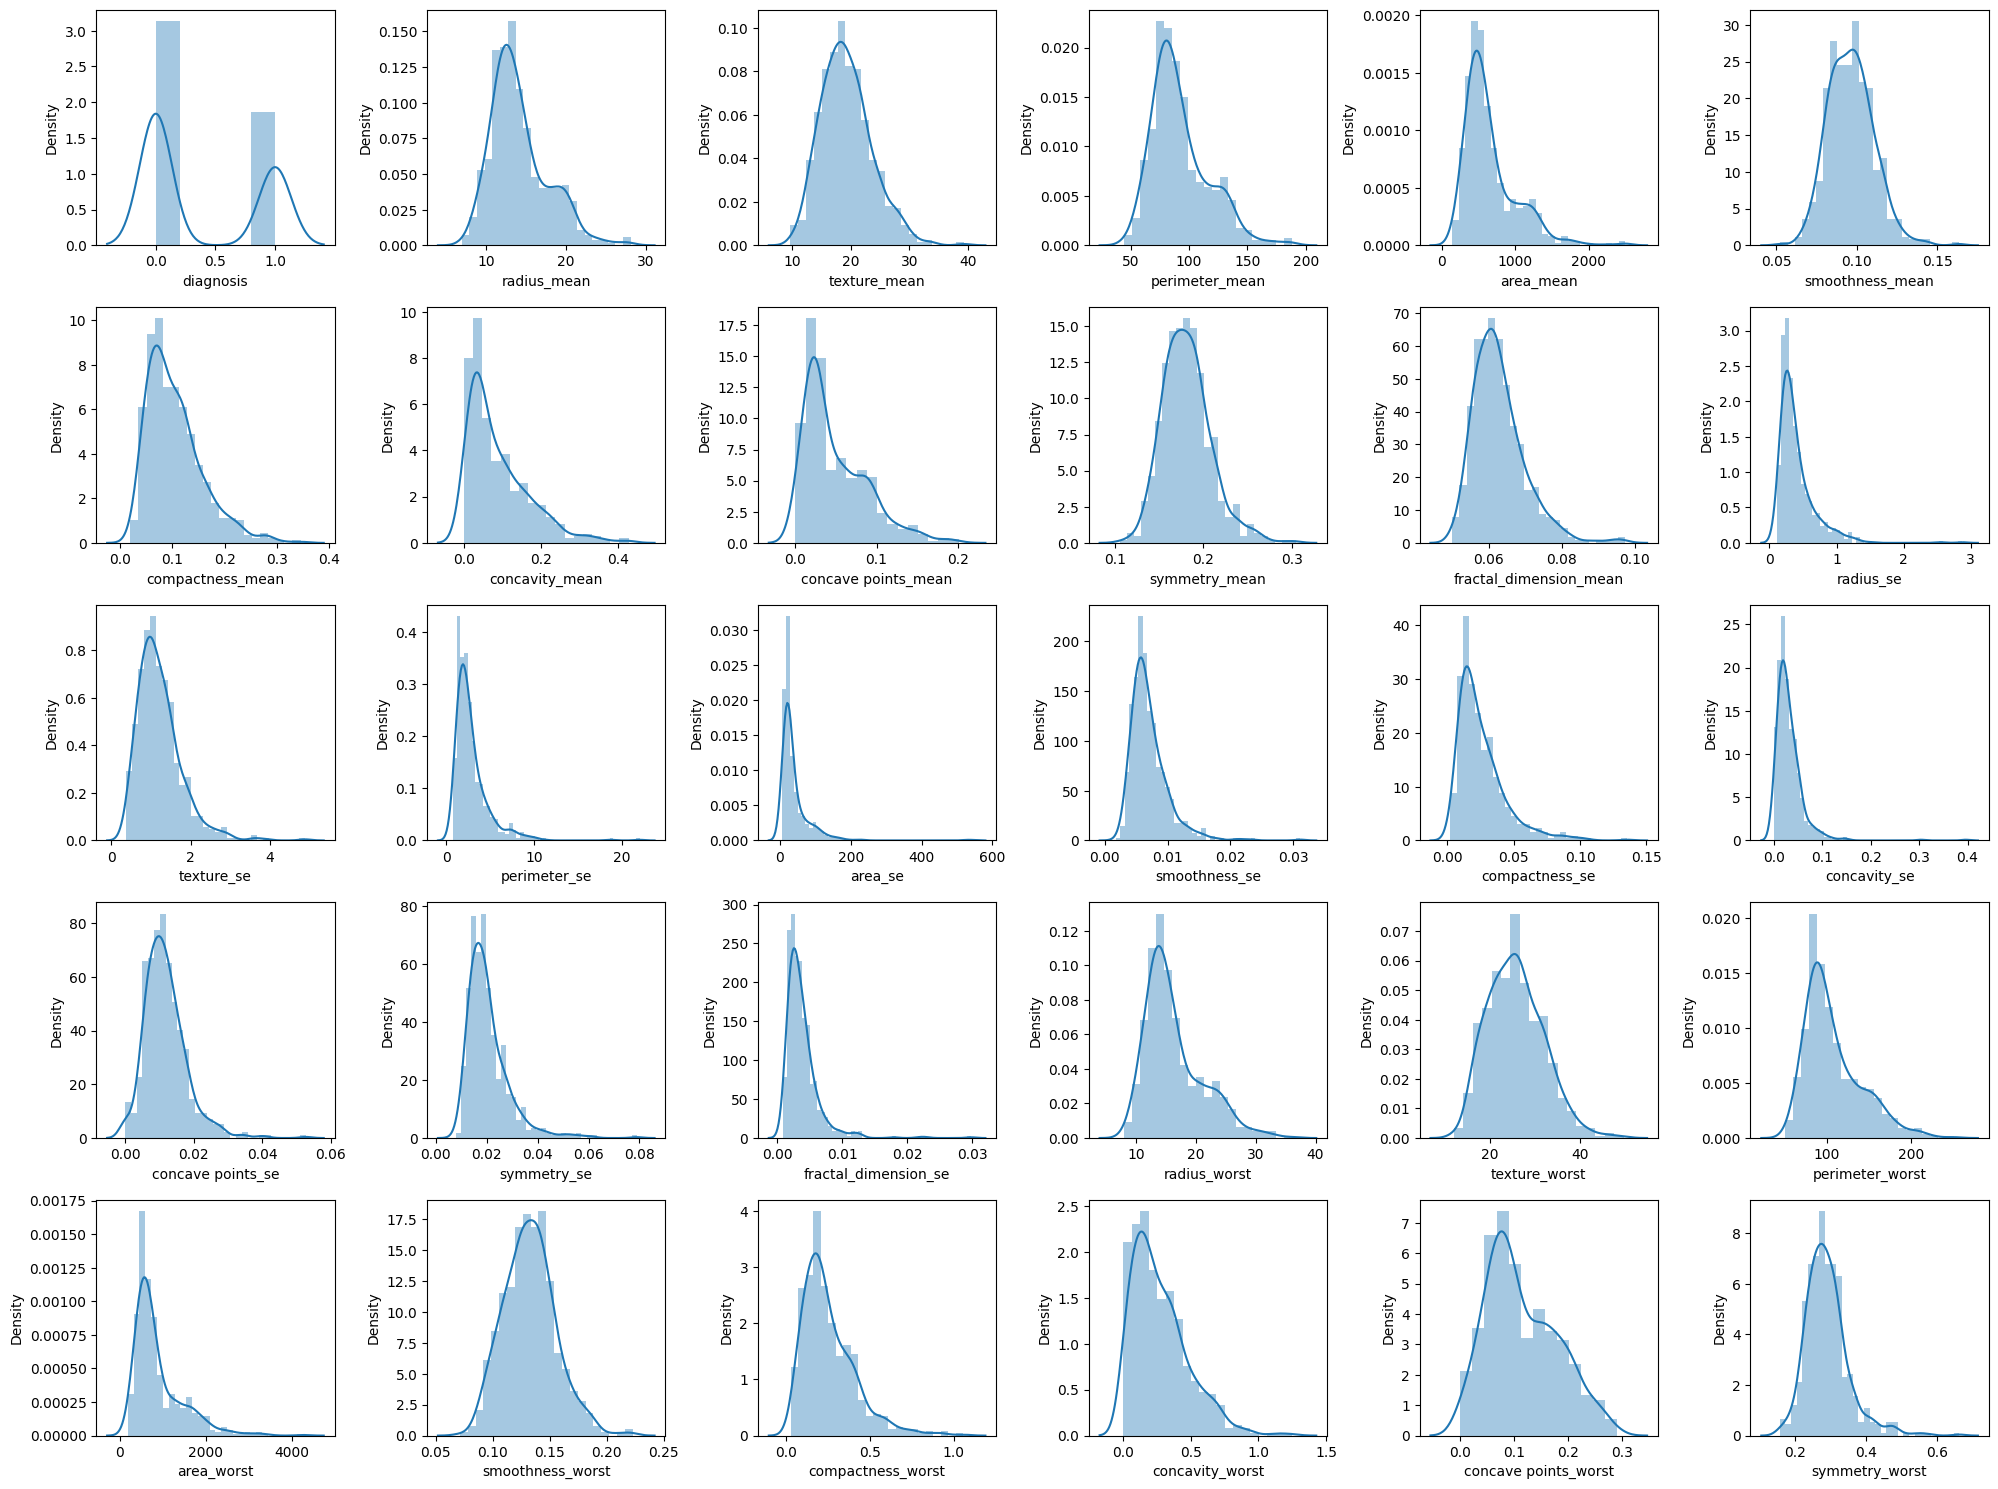

In [ ]:
# Plotting distribution plots for each column in the DataFrame df, arranged in a 5x6 grid with a figure size of 20x15 inches
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

By the above plot we can see data distribution and also identify outliers

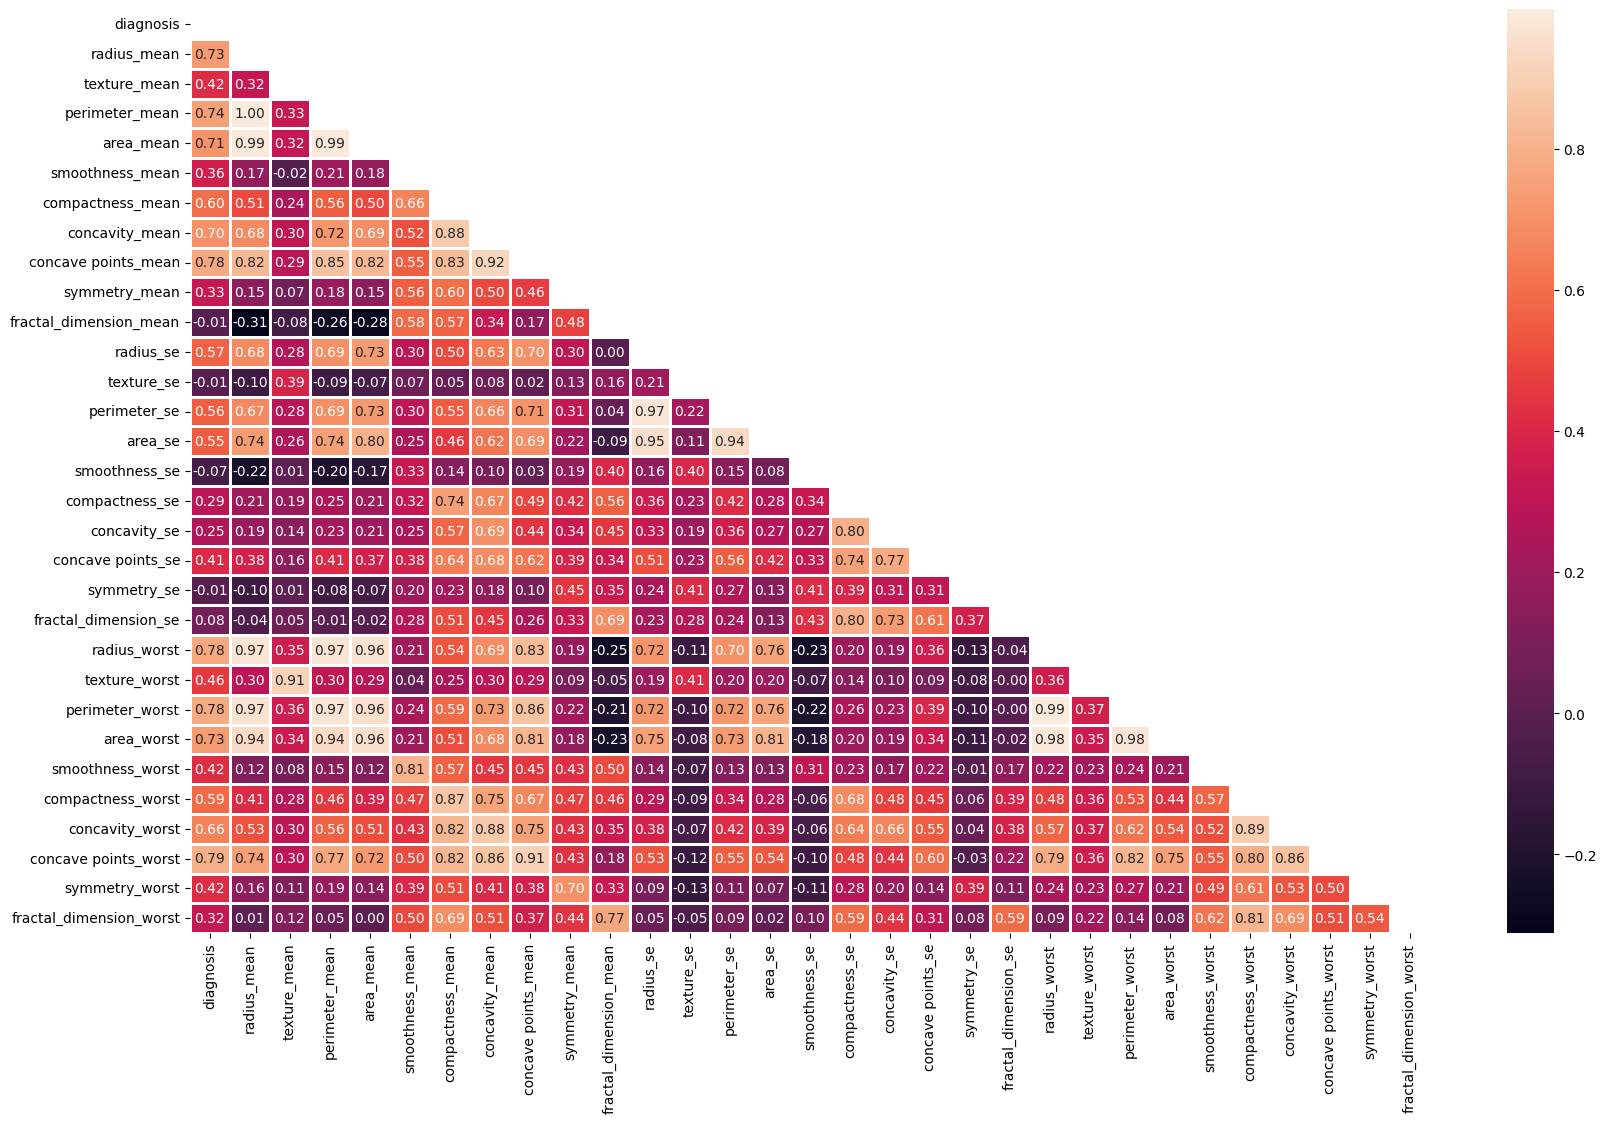

In [ ]:
# Creating a heatmap of the correlation matrix with the upper triangle masked, displaying correlation coefficients with annotations
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

We can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features

In [ ]:
# Removing columns from the DataFrame df that have a pairwise correlation greater than 0.92 to reduce multicollinearity and printing the number of remaining columns
corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


**Dealing with Outliers**

In [ ]:
# Function to detect and cap outliers in the numeric columns of the DataFrame df using the IQR method, and then applying it to the DataFrame df
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr)
        upper_bound = q3 +(1.5 * iqr)

        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:
                    df[col][i] = upper_bound[col]


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

df = mod_outlier(df)

In [ ]:
#Splitting the DataFrame df into features (X) by dropping the 'diagnosis' column and the label (y) as the 'diagnosis' column

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [ ]:
#Splitting the data into training and test sets with 30% of the data reserved for testing, and setting a random seed for reproducibility
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayes")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

cv_scores_nb = cross_val_score(nb, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores_nb)
print("Mean CV Score:", cv_scores_nb.mean())


Naive Bayes
Accuracy: 0.8830409356725146
Precision: 0.8208955223880597
Recall: 0.873015873015873
F1 Score: 0.8461538461538461
Cross-Validation Scores: [0.9122807  0.9122807  0.9122807  0.9122807  0.92982456 0.96491228
 0.9122807  0.96491228 0.92982456 0.94642857]
Mean CV Score: 0.9297305764411027


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Initialize GaussianNB model
nb = GaussianNB()

# Set up GridSearchCV to find the best var_smoothing
grid_search = GridSearchCV(nb, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter
best_var_smoothing = grid_search.best_params_['var_smoothing']
print("Best var_smoothing:", best_var_smoothing)

# Train the model with the best parameter
nb_best = GaussianNB(var_smoothing=best_var_smoothing)
nb_best.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_best.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print("\nNaive Bayes with tuned var_smoothing")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

# Cross-Validation
cv_scores_nb = cross_val_score(nb_best, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores_nb)
print("Mean CV Score:", cv_scores_nb.mean())


Best var_smoothing: 1e-08

Naive Bayes with tuned var_smoothing
Accuracy: 0.9181286549707602
Precision: 0.918906118707509
Recall: 0.9181286549707602
F1 Score: 0.9183856984751598
Cross-Validation Scores: [0.94736842 0.9122807  0.9122807  0.94736842 0.96491228 0.96491228
 0.9122807  0.96491228 0.98245614 0.92857143]
Mean CV Score: 0.9437343358395991


# Feature Importance for Naive Bayes

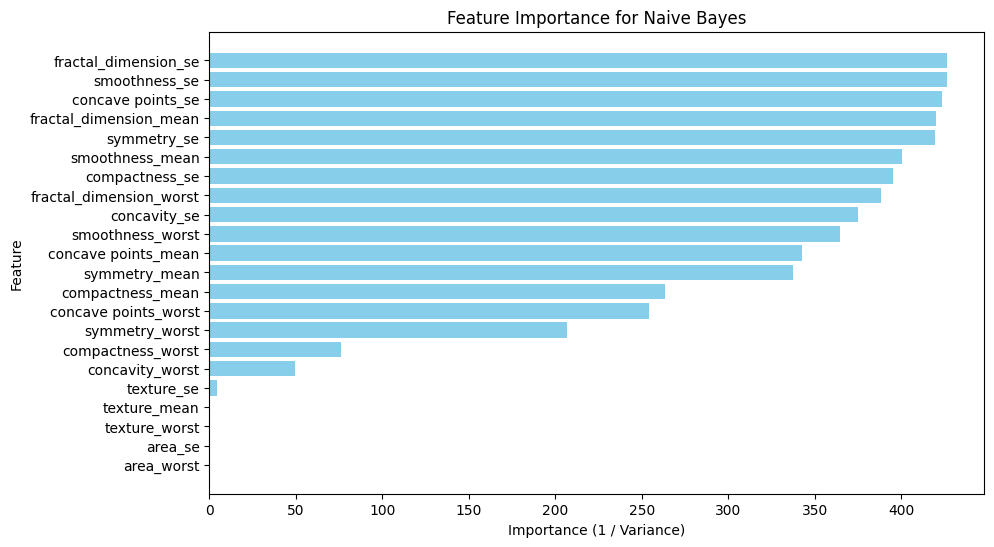

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming nb_best is the trained GaussianNB model

# Calculate feature importance as the inverse of the variance
# Use 'var_' instead of 'sigma_'
feature_importance = 1 / nb_best.var_

# Take the mean across classes if you have a multi-class problem
if feature_importance.ndim > 1:
    feature_importance = feature_importance.mean(axis=0)

# Sort the features by importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance (1 / Variance)')
plt.ylabel('Feature')
plt.title('Feature Importance for Naive Bayes')
plt.gca().invert_yaxis()
plt.show()

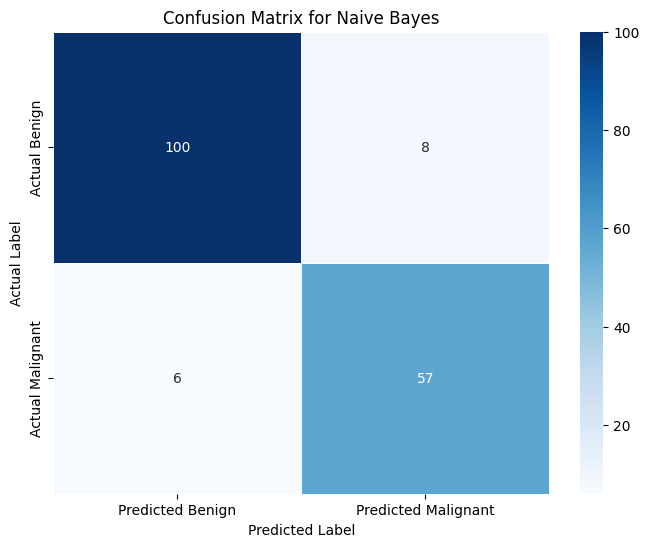

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Create a DataFrame for better visualization
cm_df_nb = pd.DataFrame(cm_nb, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_nb, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)

cv_scores_lr = cross_val_score(lr, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores_lr)
print("Mean CV Score:", cv_scores_lr.mean())


Logistic Regression
Accuracy: 0.9707602339181286
Precision: 0.967741935483871
Recall: 0.9523809523809523
F1 Score: 0.96
Cross-Validation Scores: [0.96491228 0.94736842 0.92982456 0.94736842 0.96491228 0.96491228
 0.92982456 0.96491228 0.96491228 0.96428571]
Mean CV Score: 0.9543233082706767


# After Hypertuning Parameters - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize LogisticRegression model
lr = LogisticRegression()

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(lr, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
lr_best = LogisticRegression(**best_params)
lr_best.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_best.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("\nLogistic Regression with Tuned Hyperparameters")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
# Cross-Validation
cv_scores_lr = cross_val_score(lr, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores_lr)
print("Mean CV Score:", cv_scores_lr.mean())


Best Parameters: {'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression with Tuned Hyperparameters
Accuracy: 0.9473684210526315
Precision: 0.9476066773241515
Recall: 0.9473684210526315
F1 Score: 0.9474532329725615
Cross-Validation Scores: [0.96491228 0.94736842 0.92982456 0.94736842 0.96491228 0.96491228
 0.92982456 0.96491228 0.96491228 0.96428571]
Mean CV Score: 0.9543233082706767


# Feature Importance for Logistic Regression

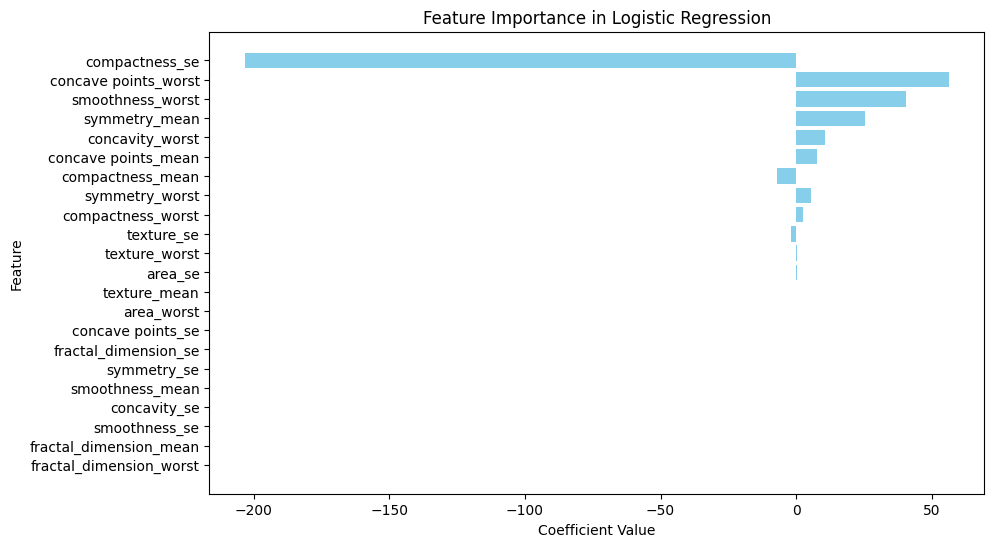

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you already have the best logistic regression model trained (lr_best)

# Retrieve the coefficients from the model
coefficients = lr_best.coef_[0]  # For binary classification, it's a 1D array

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients
feature_importance_df['Absolute Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Classification report for the above logistic regression model

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       108
           1       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



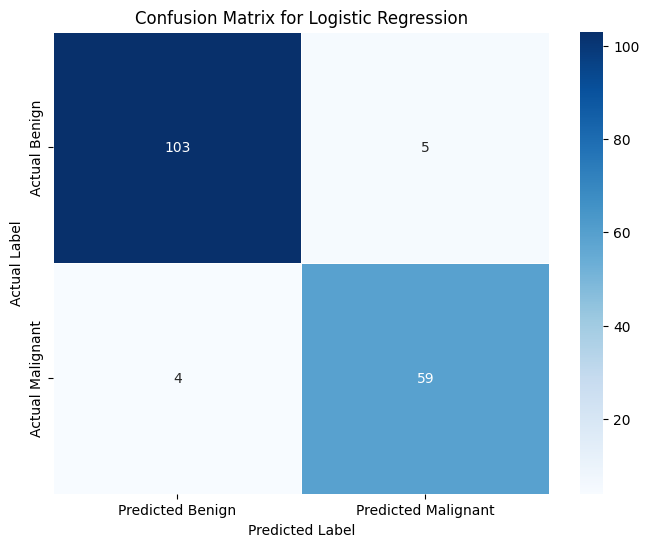

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Create a DataFrame for better visualization
cm_df_lr = pd.DataFrame(cm_lr, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_lr, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


# KNN

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("KNN")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

cv_scores_knn = cross_val_score(knn, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores_knn)
print("Mean CV Score:", cv_scores_knn.mean())

KNN
Accuracy: 0.9064327485380117
Precision: 0.8507462686567164
Recall: 0.9047619047619048
F1 Score: 0.8769230769230769
Cross-Validation Scores: [0.87719298 0.89473684 0.87719298 0.9122807  0.92982456 0.9122807
 0.94736842 0.89473684 0.89473684 0.91071429]
Mean CV Score: 0.9051065162907269


# Hypertuning KNN Parameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # Only relevant if 'minkowski' is used as a metric
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_best.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("\nKNN with Tuned Hyperparameters")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

# Cross-Validation
cv_scores_knn = cross_val_score(knn_best, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores_knn)
print("Mean CV Score:", cv_scores_knn.mean())


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

KNN with Tuned Hyperparameters
Accuracy: 0.9649122807017544
Precision: 0.9654113513100604
Recall: 0.9649122807017544
F1 Score: 0.9650224422036399
Cross-Validation Scores: [0.85964912 0.89473684 0.9122807  0.89473684 0.9122807  0.92982456
 0.94736842 0.94736842 0.92982456 0.92857143]
Mean CV Score: 0.9156641604010025


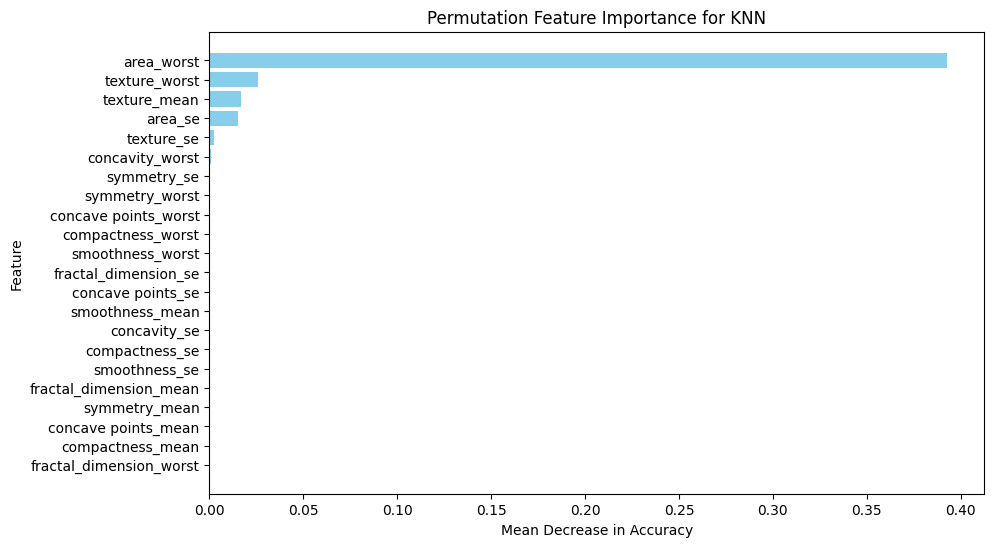

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming knn_best is the trained KNN model and X_test, y_test are defined

# Calculate permutation feature importance
result = permutation_importance(knn_best, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Get feature importance scores
importance = result.importances_mean

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance for KNN')
plt.gca().invert_yaxis()
plt.show()


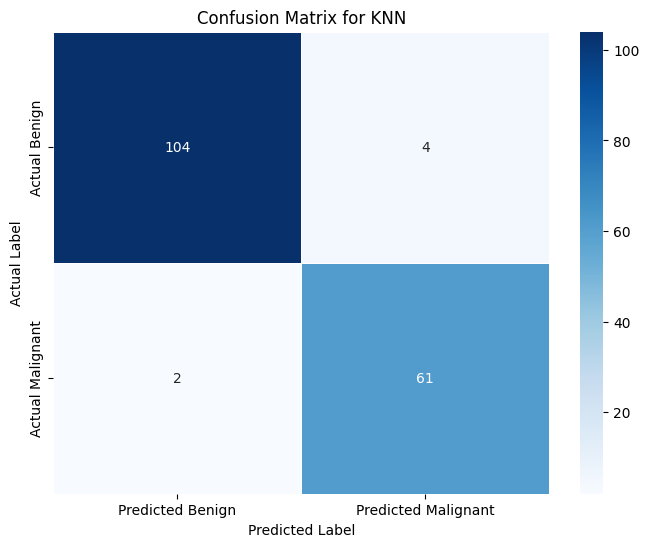

In [ ]:
#Building a confusion matrix for the KNN Classification Model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [ ]:
import pandas as pd

# Create a DataFrame to compare the performance of the models
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'KNN'],
    'Accuracy': [accuracy_nb, accuracy_lr, accuracy_knn],
    'Precision': [precision_nb, precision_lr, precision_knn],
    'Recall': [recall_nb, recall_lr, recall_knn],
    'F1 Score': [f1_nb, f1_lr, f1_knn],
    'Mean CV Score': [cv_scores_nb.mean(), cv_scores_lr.mean(), cv_scores_knn.mean()]
})

# Print the results
print(results)

# Find the model with the highest mean F1 Score
best_model = results.loc[results['F1 Score'].idxmax()]

print("\nBest Model based on F1 Score:")
print(best_model)

# Find the model with the highest mean CV Score
best_cv_model = results.loc[results['Mean CV Score'].idxmax()]

print("\nBest Model based on Cross-Validation Score:")
print(best_cv_model)


                 Model  Accuracy  Precision    Recall  F1 Score  Mean CV Score
0          Naive Bayes  0.918129   0.918906  0.918129  0.918386       0.943734
1  Logistic Regression  0.947368   0.947607  0.947368  0.947453       0.954323
2                  KNN  0.964912   0.965411  0.964912  0.965022       0.915664

Best Model based on F1 Score:
Model                 KNN
Accuracy         0.964912
Precision        0.965411
Recall           0.964912
F1 Score         0.965022
Mean CV Score    0.915664
Name: 2, dtype: object

Best Model based on Cross-Validation Score:
Model            Logistic Regression
Accuracy                    0.947368
Precision                   0.947607
Recall                      0.947368
F1 Score                    0.947453
Mean CV Score               0.954323
Name: 1, dtype: object


In [ ]:
# Fit the Naive Bayes model to the training data
nb.fit(X_train, y_train)

# Now you can predict probabilities
y_prob_nb = nb.predict_proba(X_test)[:, 1]

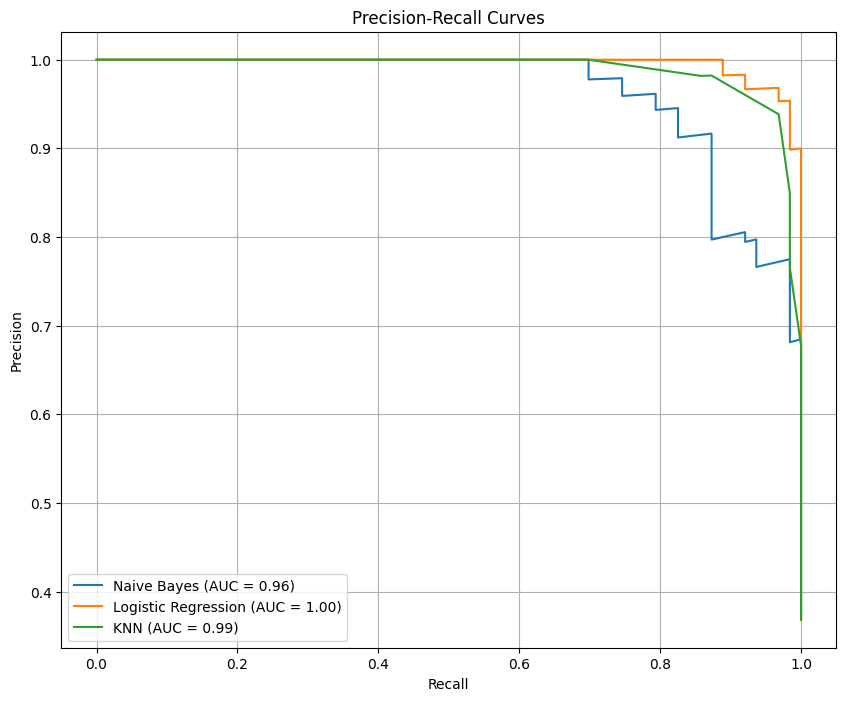

In [ ]:
# Fit the Logistic Regression model to the training data
lr.fit(X_train, y_train)

# Build a precision recall curve for all the 3 methods above

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Naive Bayes
y_prob_nb = nb.predict_proba(X_test)[:, 1]
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)
auc_nb = auc(recall_nb, precision_nb)

# Logistic Regression
y_prob_lr = lr.predict_proba(X_test)[:, 1] # Now this line will work
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
auc_lr = auc(recall_lr, precision_lr)

# KNN
y_prob_knn = knn_best.predict_proba(X_test)[:, 1] # Use knn_best instead of knn
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn)
auc_knn = auc(recall_knn, precision_knn)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 8))
plt.plot(recall_nb, precision_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(recall_knn, precision_knn, label=f'KNN (AUC = {auc_knn:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

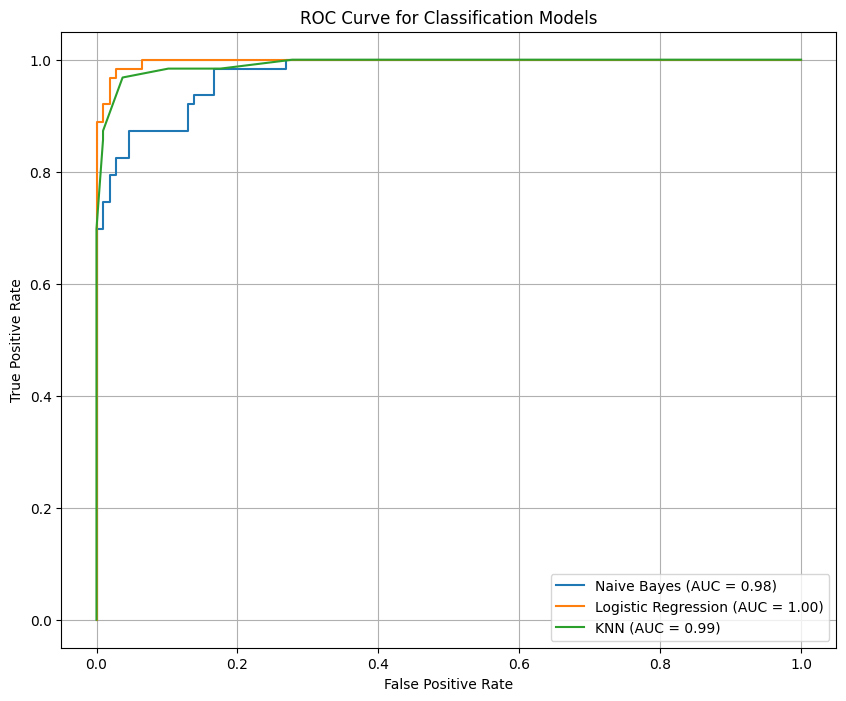

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

# Create a figure for the plots
plt.figure(figsize=(10, 8))

# Plot ROC curve for Naive Bayes
plot_roc_curve(nb, X_test, y_test, 'Naive Bayes')

# Plot ROC curve for Logistic Regression
plot_roc_curve(lr, X_test, y_test, 'Logistic Regression')

# Assuming 'knn_best' is your fitted KNN model from previous cells
plot_roc_curve(knn_best, X_test, y_test, 'KNN') # Use knn_best instead of knn

# Add plot details
plt.title('ROC Curve for Classification Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Correcting the max_features parameter from 'auto' to 'sqrt'
rand_clf = RandomForestClassifier(
    criterion='entropy',
    max_depth=11,
    max_features='sqrt',  # Use 'sqrt' instead of 'auto'
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130,
    random_state=42  # Optional: setting a random state for reproducibility
)

# Fitting the model
rand_clf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130, random_state=42)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.992462311557789
0.9649122807017544


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



# After Hypertuning Parameters for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 130, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 11, 15],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the RandomForestClassifier
rand_clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(rand_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
rand_clf_best = RandomForestClassifier(**best_params, random_state=42)
rand_clf_best.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rand_clf_best.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Cross-Validation
cv_scores_rf = cross_val_score(rand_clf_best, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Score:", cv_scores_rf.mean())


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Random Forest
Accuracy: 0.9707602339181286
Precision: 0.9711000474158369
Recall: 0.9707602339181286
F1 Score: 0.970603923775359

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Cross-Validation Scores: [0.98245614 0.92982456 0.94736842 0.96491228 1.         0.98245614
 0.92982456 1.         0.96491228 0.98214286]
Mean CV Score: 0.9683897243107771


**Feature Importance for Random Forest**

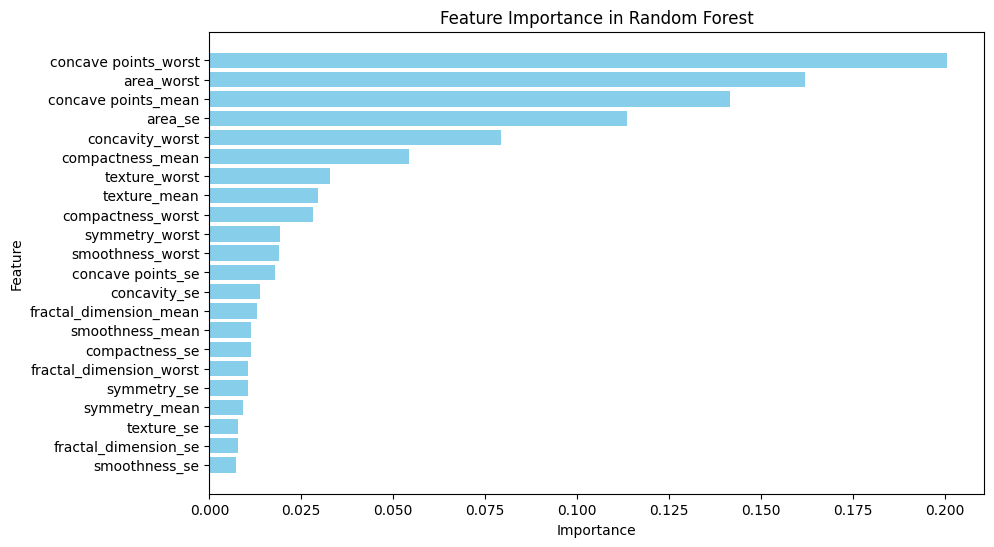

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rand_clf_best is the trained RandomForestClassifier model

# Get the feature importances
feature_importances = rand_clf_best.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()


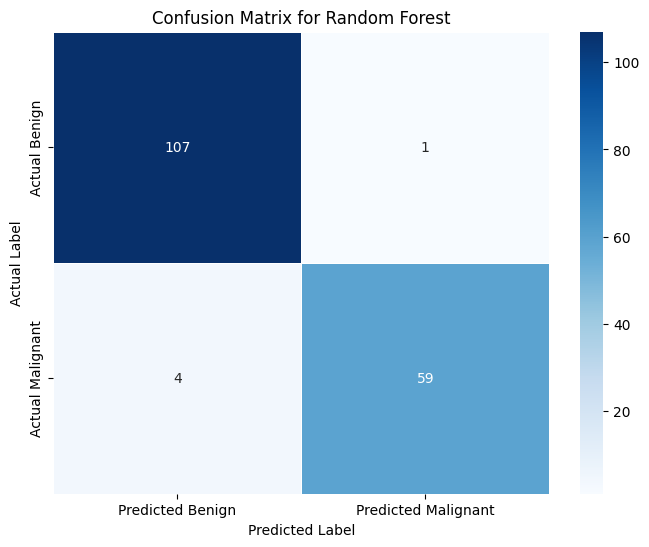

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute the confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame for better visualization
cm_rf_df = pd.DataFrame(cm_rf, index=['Actual Benign', 'Actual Malignant'], columns=['Predicted Benign', 'Predicted Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(dt_clf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
dt_clf_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_clf_best.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_clf_best.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("\nDecision Tree")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Cross-Validation
cv_scores_dt = cross_val_score(dt_clf_best, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores_dt)
print("Mean CV Score:", cv_scores_dt.mean())


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}

Decision Tree
Accuracy: 0.9122807017543859
Precision: 0.9126291195277915
Recall: 0.9122807017543859
F1 Score: 0.912422054954269

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       108
           1       0.88      0.89      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171

Cross-Validation Scores: [0.92982456 0.78947368 0.87719298 0.9122807  0.92982456 0.92982456
 0.84210526 0.94736842 0.92982456 0.96428571]
Mean CV Score: 0.9052005012531327


**Feature Importance for Decision Tree Classifier**

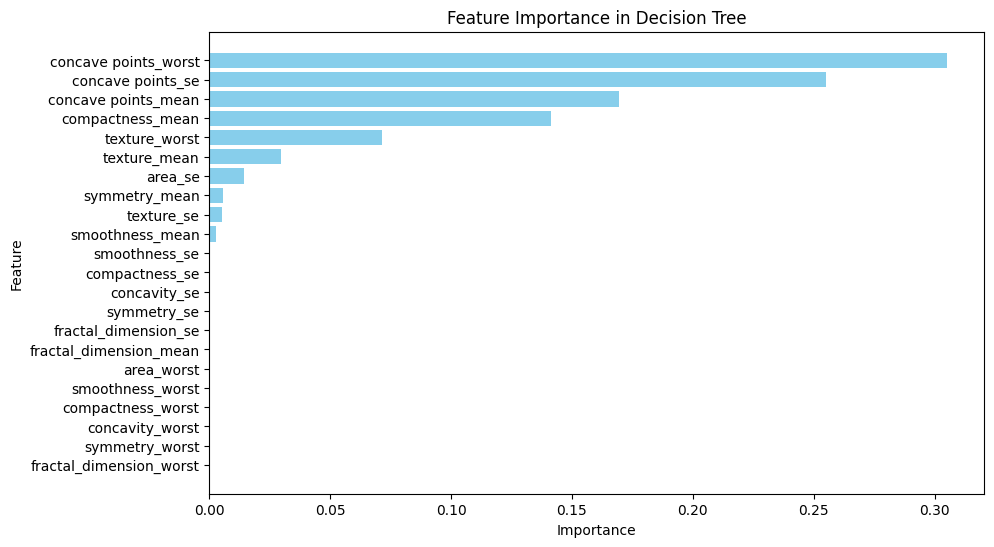

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming dt_clf_best is the trained DecisionTreeClassifier model

# Get the feature importances
feature_importances = dt_clf_best.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.show()


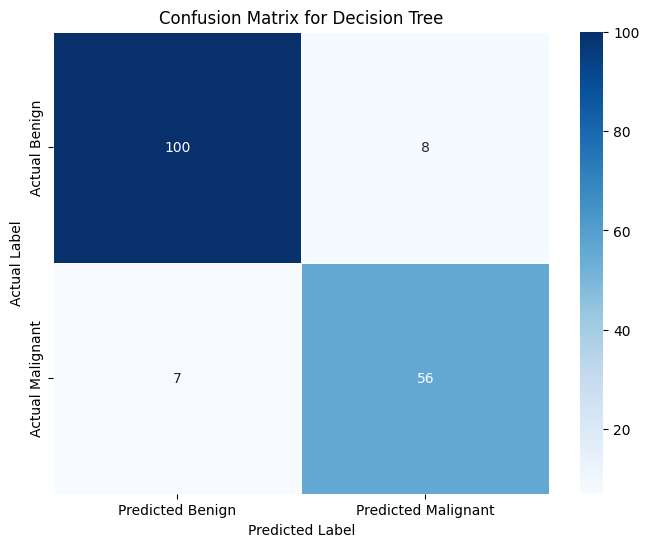

In [ ]:
# Confusion matrix for the decision tree classifier

import pandas as pd
import matplotlib.pyplot as plt
# Compute the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Create a DataFrame for better visualization
cm_dt_df = pd.DataFrame(cm_dt, index=['Actual Benign', 'Actual Malignant'],
                       columns=['Predicted Benign', 'Predicted Malignant'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

# Set up GridSearchCV to find the best parameters
grid_search_gbc = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train, y_train)

# Best parameters
best_params = grid_search_gbc.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
gbc_best = GradientBoostingClassifier(**best_params)
gbc_best.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(gbc_best, X_train, y_train, cv=5, n_jobs=-1)
mean_cv_score = cv_scores.mean()

# Predict on the test set
y_pred_gbc = gbc_best.predict(X_test)

# Evaluate the model
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc, average='weighted')
recall_gbc = recall_score(y_test, y_pred_gbc, average='weighted')
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')

print("\nGradient Boosting Classifier")
print("Accuracy:", accuracy_gbc)
print("Precision:", precision_gbc)
print("Recall:", recall_gbc)
print("F1 Score:", f1_gbc)
print("Mean Cross-Validation Score:", mean_cv_score)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbc))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 180}

Gradient Boosting Classifier
Accuracy: 0.9824561403508771
Precision: 0.9829302987197724
Recall: 0.9824561403508771
F1 Score: 0.9823623542652152
Mean Cross-Validation Score: 0.9598101265822784

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



**Feature Importance for Gradient Boosting Classifier**

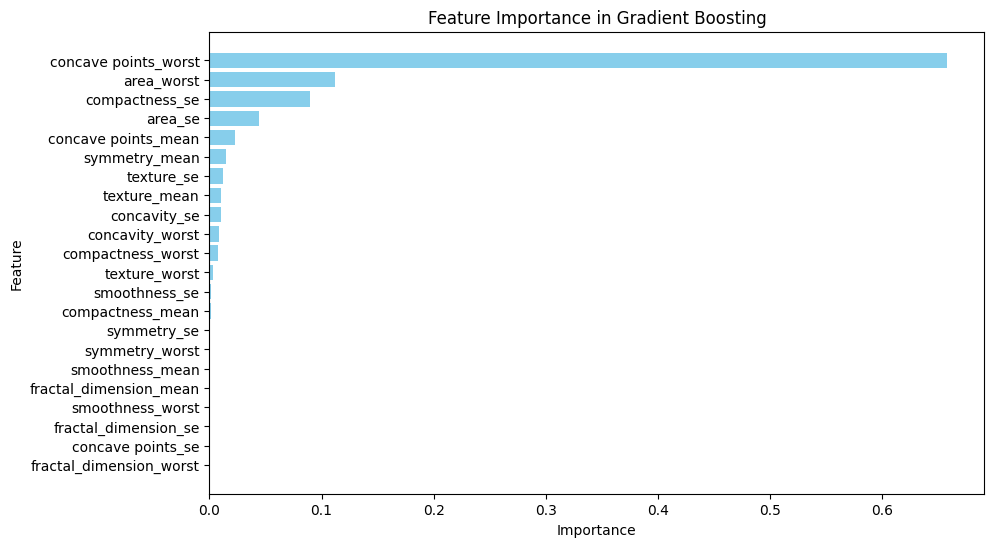

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature importances from the Gradient Boosting model
feature_importances = gbc_best.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.show()


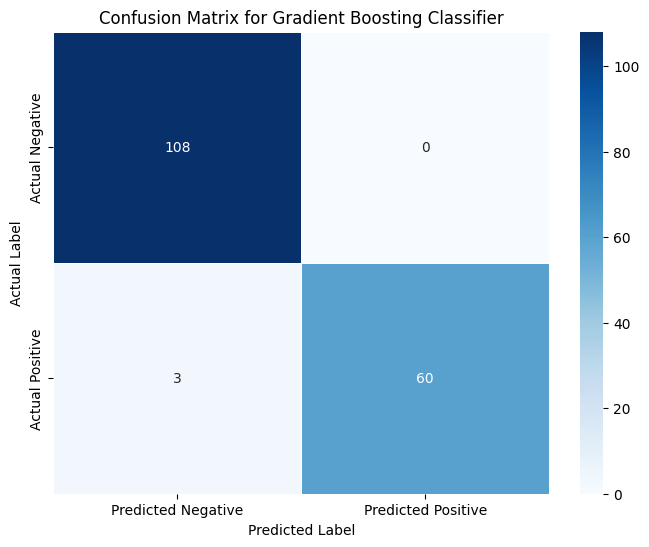

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute the confusion matrix for Gradient Boosting
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

# Create a DataFrame for better visualization
cm_gbc_df = pd.DataFrame(cm_gbc, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()


In [ ]:
# Create a DataFrame to compare the performance of the models
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'Gradient Boosting'],
    'Accuracy': [accuracy_nb, accuracy_lr, accuracy_knn, accuracy_rf, accuracy_dt, accuracy_gbc],
    'Precision': [precision_nb, precision_lr, precision_knn, precision_rf, precision_dt, precision_gbc],
    'Recall': [recall_nb, recall_lr, recall_knn, recall_rf, recall_dt, recall_gbc],
    'F1 Score': [f1_nb, f1_lr, f1_knn, f1_rf, f1_dt, f1_gbc],
    'Mean CV Score': [cv_scores_nb.mean(), cv_scores_lr.mean(), cv_scores_knn.mean(), cv_scores_rf.mean(), cv_scores_dt.mean(), cv_scores.mean()]
})

In [ ]:
# Print the results dataframe and write code for which model performed the best

# Print the results
print(results)

# Find the model with the highest mean F1 Score
best_model = results.loc[results['F1 Score'].idxmax()]

print("\nBest Model based on F1 Score:")
print(best_model)

# Find the model with the highest mean CV Score
best_cv_model = results.loc[results['Mean CV Score'].idxmax()]

print("\nBest Model based on Cross-Validation Score:")
print(best_cv_model)


                 Model  Accuracy  \
0          Naive Bayes  0.918129   
1  Logistic Regression  0.947368   
2                  KNN  0.964912   
3        Random Forest  0.970760   
4        Decision Tree  0.912281   
5    Gradient Boosting  0.982456   

                                           Precision  \
0  [0.3684210526315789, 0.37058823529411766, 0.37...   
1  [0.3684210526315789, 0.37058823529411766, 0.37...   
2  [0.3684210526315789, 0.6774193548387096, 0.765...   
3                                             0.9711   
4                                           0.912629   
5                                            0.98293   

                                              Recall  F1 Score  Mean CV Score  
0  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  0.918386       0.943734  
1  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  0.947453       0.954323  
2  [1.0, 1.0, 0.9841269841269841, 0.9841269841269...  0.965022       0.915664  
3                                 

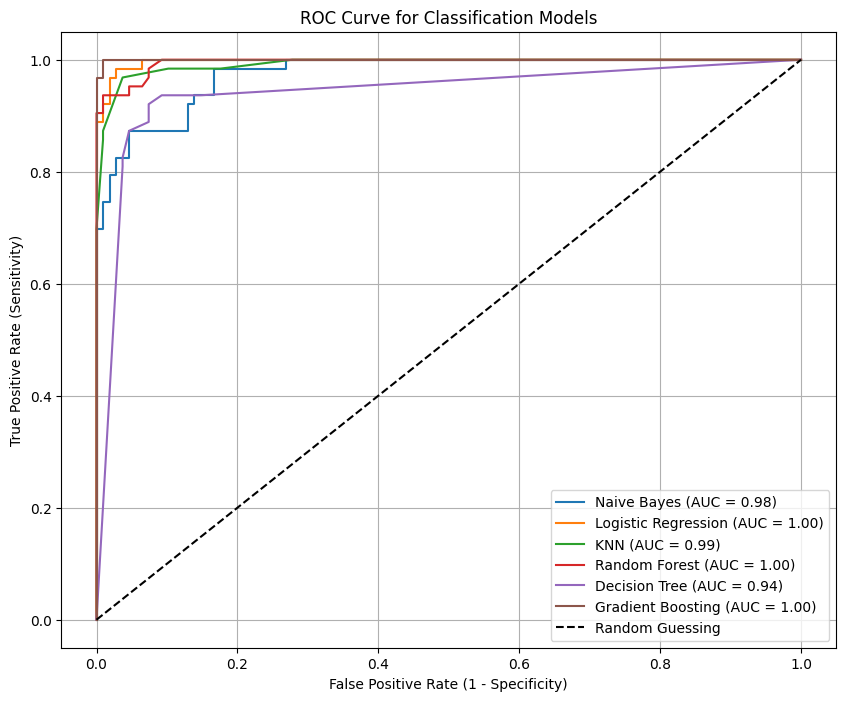

In [ ]:
## Build an ROC curve to compare the performance of each model and give an explanation of the curve

import matplotlib.pyplot as plt
# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

# Create a figure for the plots
plt.figure(figsize=(10, 8))

# Plot ROC curves for all models
plot_roc_curve(nb, X_test, y_test, 'Naive Bayes')
plot_roc_curve(lr, X_test, y_test, 'Logistic Regression')
plot_roc_curve(knn_best, X_test, y_test, 'KNN')
plot_roc_curve(rand_clf_best, X_test, y_test, 'Random Forest')
plot_roc_curve(dt_clf_best, X_test, y_test, 'Decision Tree')
plot_roc_curve(gbc_best, X_test, y_test, 'Gradient Boosting')

# Add plot details
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing') # Diagonal line for random guessing
plt.title('ROC Curve for Classification Models')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


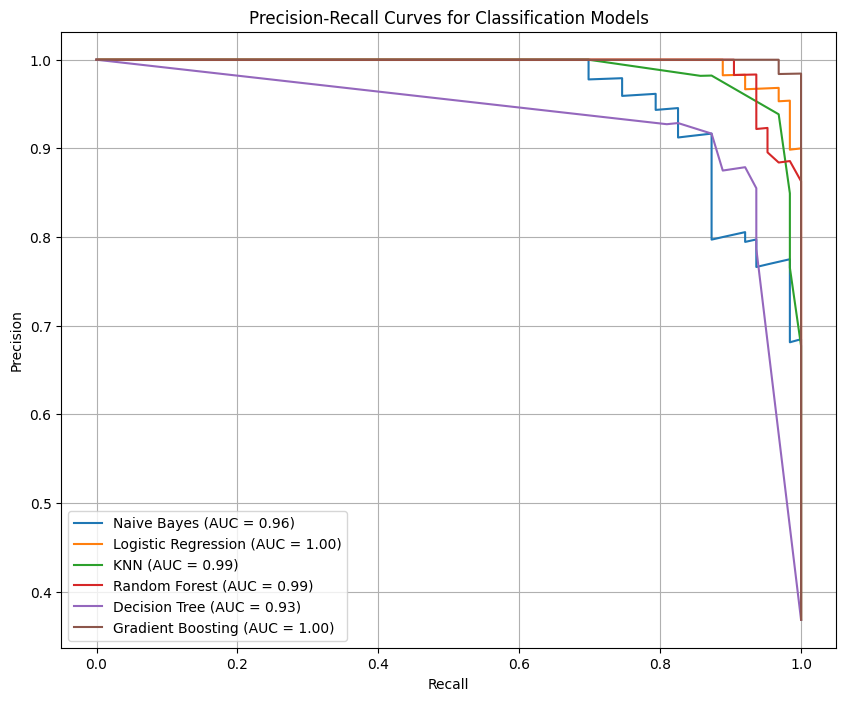

In [ ]:
# Precision-Recall curve to compare the perfomance of each model

import matplotlib.pyplot as plt
# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'{label} (AUC = {auc_score:.2f})')

# Create a figure for the plots
plt.figure(figsize=(10, 8))

# Plot Precision-Recall curves for all models
plot_precision_recall_curve(nb, X_test, y_test, 'Naive Bayes')
plot_precision_recall_curve(lr, X_test, y_test, 'Logistic Regression')
plot_precision_recall_curve(knn_best, X_test, y_test, 'KNN')
plot_precision_recall_curve(rand_clf_best, X_test, y_test, 'Random Forest')
plot_precision_recall_curve(dt_clf_best, X_test, y_test, 'Decision Tree')
plot_precision_recall_curve(gbc_best, X_test, y_test, 'Gradient Boosting')

# Add plot details
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Classification Models')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
